In [15]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [9]:
class linear_regression(nn.Module):
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [10]:
class Data(Dataset):
    def __init__(self):
            self.x=torch.zeros(20,2)
            self.x[:,0]=torch.arange(-1,1,0.1)
            self.x[:,1]=torch.arange(-1,1,0.1)
            self.w = torch.tensor([[1.0,-1.0],[1.0,3.0]])
            self.b = torch.tensor([[1.0,-1.0]])
            self.f = torch.mm(self.x,self.w) + self.b

            self.y = self.f + 0.001 * torch.randn((self.x.shape[0],1))
            self.len = self.x.shape[0]

    def __getitem__(self,index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.len

In [13]:
dataset = Data()
criterion = nn.MSELoss()
trainloader = DataLoader(dataset=dataset, batch_size=5)

model = linear_regression(input_size=2, output_size=2)
print(model.state_dict())

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

OrderedDict([('linear.weight', tensor([[-0.1714,  0.6078],
        [ 0.6061,  0.6877]])), ('linear.bias', tensor([0.2785, 0.1767]))])


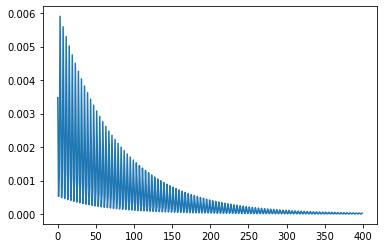

In [16]:
LOSS = []
epochs = 100

for epoch in range(epochs):
    for x, y in trainloader:
        yhat = model(x)
        loss = criterion(yhat, y)
        LOSS.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

plt.plot(LOSS)
plt.show()